# Adabag / Adaboost

<font style="font-size:x-large">
    Basic Idea of Boosting:<br><br>
    <ul>
    <li> Generate decision trees on multiple training sets<br><br>
    <li> Train on residual error rather than total error <br><br>
    <li> Iteratively update the residual error and update  <br><br>
     
    </ul>
    </font>

### Load Wine data from UCI 

In [2]:
uci="http://archive.ics.uci.edu/"
mld="ml/machine-learning-databases/"
redcsv="wine-quality/winequality-red.csv"
wineurl=paste(uci,mld,redcsv,sep="")
wineurl

[1] "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [3]:
red.wine.data=read.csv(wineurl, header = TRUE, sep = ";")

In [69]:
colnames(red.wine.data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

## Create test and training sets, 75% for training

In [5]:
n=nrow(red.wine.data)
training.indices=sort(sample(1:n,.75*n))  # use 75% for training
train=red.wine.data[training.indices,]
test=red.wine.data[-training.indices,]
ntrain = nrow(train)
ntrain

[1] 1199

In [ ]:
#install.packages("adabag", repos='http://cran.us.r-project.org')

In [51]:
library(rpart)
library(adabag)
library(caret)

## Do boosting. The parameters used are as suggested in the reference manual 

## The y-data must be a "factor"
## The x-data should be a data frame

In [23]:
train$quality = as.factor(train$quality)

In [71]:
adaboost.model = boosting(quality~., data=train, 
   boos=TRUE, 
   coeflearn="Breiman",
   mfinal = 100, 
   par=FALSE, 
   control=rpart.control(maxdepth=10, minsplit=15))

In [72]:
summary(adaboost.model) 

           Length Class   Mode     
formula       3   formula call     
trees       100   -none-  list     
weights     100   -none-  numeric  
votes      7194   -none-  numeric  
prob       7194   -none-  numeric  
class      1199   -none-  character
importance   11   -none-  numeric  
terms         3   terms   call     
call          8   -none-  call     

## Do a prediction using the test data

In [77]:
boost.predict=predict(adaboost.model, newdata=test)
summary(boost.predict)

          Length Class   Mode     
formula      3   formula call     
votes     2400   -none-  numeric  
prob      2400   -none-  numeric  
class      400   -none-  character
confusion   18   table   numeric  
error        1   -none-  numeric  

## convert the predictions from the test data into a "factor" using the same levels as y data

In [88]:
pred=factor(boost.predict$class,level=levels(y.test))

In [90]:
print(pred[1:10])

 [1] 5 5 5 5 6 5 5 5 5 6
Levels: 3 4 5 6 7 8


## Generate mult-factor confusion matrix

In [79]:
confusionMatrix(data=pred, reference=y.test)

Confusion Matrix and Statistics

          Reference
Prediction   3   4   5   6   7   8
         3   0   0   0   0   0   0
         4   0   0   0   0   0   0
         5   1   9 122  42   2   0
         6   0   6  44 103  38   3
         7   0   0   0  13  14   3
         8   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.5975          
                 95% CI : (0.5476, 0.6459)
    No Information Rate : 0.415           
    P-Value [Acc > NIR] : 1.583e-13       
                                          
                  Kappa : 0.3463          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 3 Class: 4 Class: 5 Class: 6 Class: 7 Class: 8
Sensitivity            0.0000   0.0000   0.7349   0.6519   0.2593    0.000
Specificity            1.0000   1.0000   0.7692   0.6240   0.9538    1.000
Pos Pred Value            NaN      NaN   0.6932   0.5309   0.4667      NaN
Neg Pred Value 

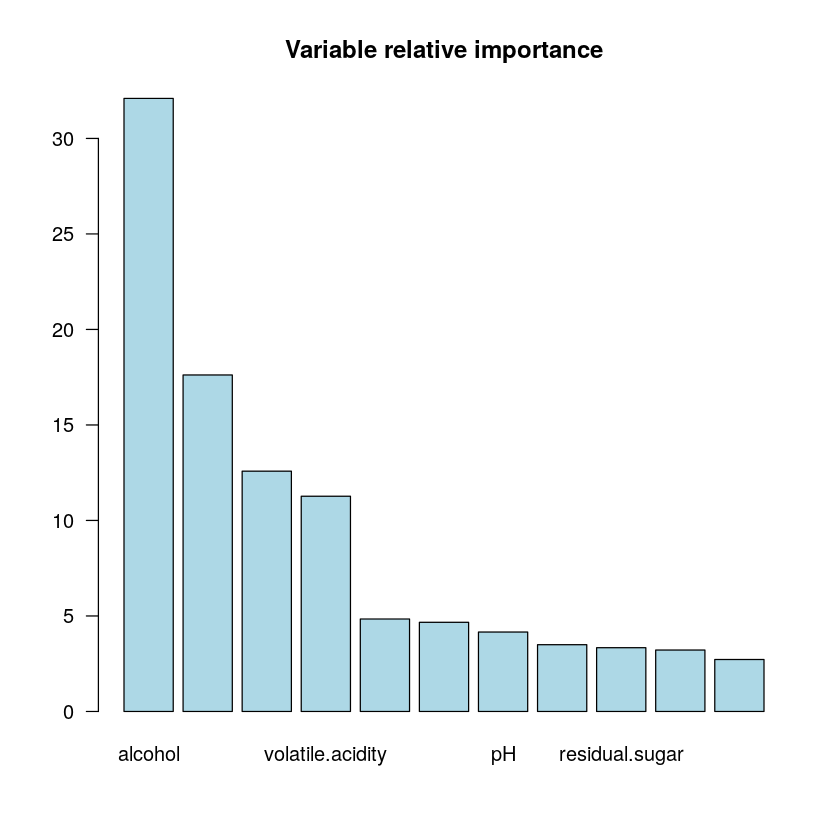

In [81]:
importanceplot(adaboost.model)

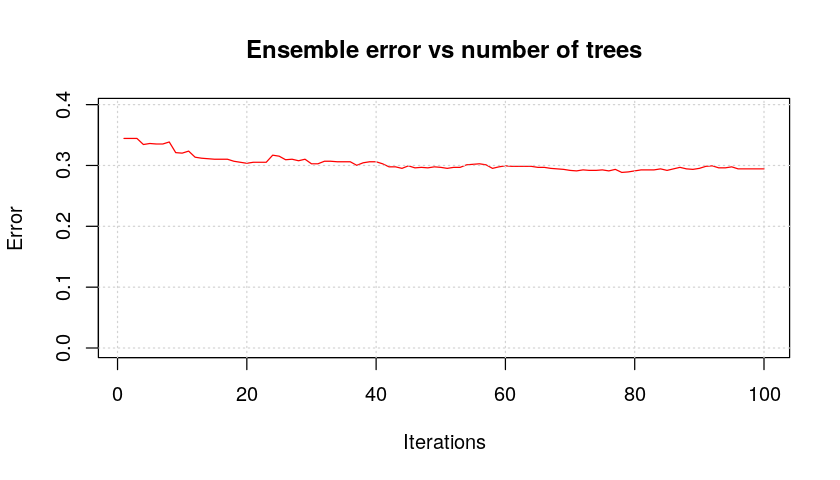

In [94]:
options(repr.plot.width=7, repr.plot.height=4)
#pdf("boosting-wine-tree.pdf",width=7,height=4)
plot(errorevol(adaboost.model,train))
grid()
#dev.off()